# Análises 


## Preparando o ambiente de execução

In [1]:
import pandas as pd
import numpy as np
import geopandas
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
db_path = 'eleicao.db'
conn = sqlite3.connect(db_path)

In [3]:
cur = conn.cursor()

## Selecionando Deputados Alvo da Análise

### Deputado Federal mais votado dentre os eleitos

In [4]:
querry = """
SELECT vc.NM_CANDIDATO, SUM(vc.QT_VOTOS_NOMINAIS_VALIDOS) as QT_VOTOS_VALIDOS
FROM votos_candidato as vc
WHERE vc.DS_CARGO = 'DEPUTADO FEDERAL' and (vc.DS_SIT_TOT_TURNO = 'ELEITO POR QP' or vc.DS_SIT_TOT_TURNO = 'ELEITO POR MEDIA')
GROUP by vc.NM_CANDIDATO
"""

In [5]:
df = pd.read_sql_query(querry,conn)
df.sort_values(by='QT_VOTOS_VALIDOS',ascending=False).head()

,NM_CANDIDATO,QT_VOTOS_VALIDOS
29,OTTO ROBERTO MENDONCA DE ALENCAR FILHO,200909
11,ELMAR JOSE VIEIRA NASCIMENTO,175439
10,DIEGO HENRIQUE SILVA CERQUEIRA MARTINS,171684
6,ANTONIO LUIZ PARANHOS RIBEIRO LEITE DE BRITO,165386
28,ORLANDO SULZ DE ALMEIDA NETO,164655


In [6]:
candidato1 = 'OTTO ROBERTO MENDONCA DE ALENCAR FILHO'

### Deputado Federal mais votado dentre os eleitos por média

In [7]:
querry = """
SELECT vc.NM_CANDIDATO, SUM(vc.QT_VOTOS_NOMINAIS_VALIDOS) as QT_VOTOS_VALIDOS
FROM votos_candidato as vc
WHERE vc.DS_CARGO = 'DEPUTADO FEDERAL' and vc.DS_SIT_TOT_TURNO = 'ELEITO POR MEDIA'
GROUP by vc.NM_CANDIDATO
"""

In [8]:
df = pd.read_sql_query(querry,conn)
df.sort_values(by='QT_VOTOS_VALIDOS',ascending=False).head()

,NM_CANDIDATO,QT_VOTOS_VALIDOS
4,LIDICE DA MATA E SOUZA,112385
5,PAULO SERGIO PARANHOS DE MAGALHAES,107093
3,JOSEILDO RIBEIRO RAMOS,104228
1,JOAO FELIPE DE SOUZA LEAO,102376
8,VALMIR CARLOS DA ASSUNCAO,90148


In [9]:
candidato2 = 'LIDICE DA MATA E SOUZA'

### Deputado Federal com mais votos dentre os não eleitos ou suplentes

In [10]:
querry = """
SELECT vc.NM_CANDIDATO, SUM(vc.QT_VOTOS_NOMINAIS_VALIDOS) as QT_VOTOS_VALIDOS
FROM votos_candidato as vc
WHERE vc.DS_CARGO = 'DEPUTADO FEDERAL' and (vc.DS_SIT_TOT_TURNO = 'NAO ELEITO' or vc.DS_SIT_TOT_TURNO = 'SUPLENTE')
GROUP by vc.NM_CANDIDATO
"""

In [11]:
df = pd.read_sql_query(querry,conn)
df.sort_values(by='QT_VOTOS_VALIDOS',ascending=False).head()

,NM_CANDIDATO,QT_VOTOS_VALIDOS
110,CHARLES FERNANDES SILVEIRA SANTANA,99815
353,JOSIAS GOMES DA SILVA,90131
50,ANDRE PORCIUNCULA ALAY ESTEVES,82693
186,ELISANGELA DOS SANTOS ARAUJO,73138
620,WALLISON OLIVEIRA TORRES,72416


In [12]:
candidato3 = 'CHARLES FERNANDES SILVEIRA SANTANA'

## Analisando correlação entre os votos dos candidatos selecionados e a taxa de alfabetização dos municípios

### Avaliando distribuição dos votos dos candidatos selecionados

#### OTTO ROBERTO MENDONCA DE ALENCAR FILHO

In [13]:
querry = """
select m.GEOMETRY, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS
from votos_candidato v,municipio as m, basico as b
where v.NM_CANDIDATO = 'OTTO ROBERTO MENDONCA DE ALENCAR FILHO' and v.CD_MUN = m.CD_MUN and v.CD_MUN = b.CD_MUN  
group by v.CD_MUN 
"""

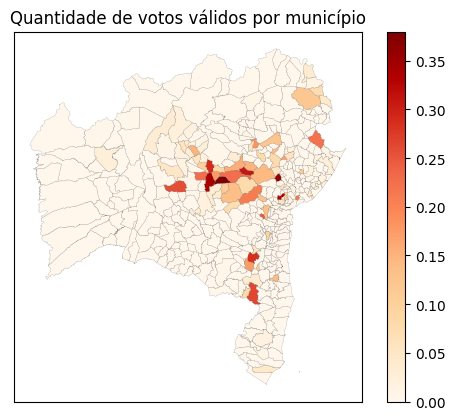

In [31]:
r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'TOTAL_VOTOS_VALIDOS',legend=True,cmap='OrRd',edgecolor='#4B4B4B',linewidth = 0.1)

plt.xticks([])
plt.yticks([])
plt.title('Quantidade de votos válidos por município')
plt.show()

#### LIDICE DA MATA E SOUZA

In [33]:
querry = """
select m.GEOMETRY, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS
from votos_candidato v,municipio as m, basico as b
where v.NM_CANDIDATO = 'LIDICE DA MATA E SOUZA' and v.CD_MUN = m.CD_MUN and v.CD_MUN = b.CD_MUN  
group by v.CD_MUN 
"""

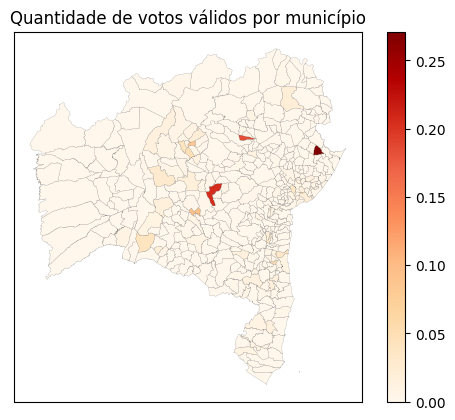

In [34]:
r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'TOTAL_VOTOS_VALIDOS',legend=True,cmap='OrRd',edgecolor='#4B4B4B',linewidth = 0.1)

plt.xticks([])
plt.yticks([])
plt.title('Quantidade de votos válidos por município')
plt.show()

#### CHARLES FERNANDES SILVEIRA SANTANA

In [36]:
querry = """
select m.GEOMETRY, SUM(v.QT_VOTOS_NOMINAIS_VALIDOS ) * 1.0 / b.V0001 as TOTAL_VOTOS_VALIDOS
from votos_candidato v,municipio as m, basico as b
where v.NM_CANDIDATO = 'CHARLES FERNANDES SILVEIRA SANTANA' and v.CD_MUN = m.CD_MUN and v.CD_MUN = b.CD_MUN  
group by v.CD_MUN 
"""

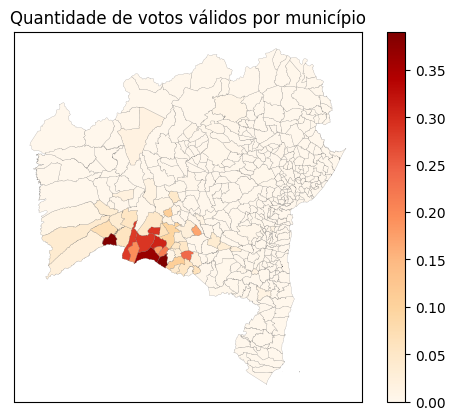

In [37]:
r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'TOTAL_VOTOS_VALIDOS',legend=True,cmap='OrRd',edgecolor='#4B4B4B',linewidth = 0.1)

plt.xticks([])
plt.yticks([])
plt.title('Quantidade de votos válidos por município')
plt.show()

### Avaliando a distribuição da população pelo estado

In [50]:
querry= """
SELECT m.GEOMETRY, LOG(b.V0001) as Populacao
FROM municipio as m, basico as b
WHERE m.CD_MUN = b.CD_MUN
"""

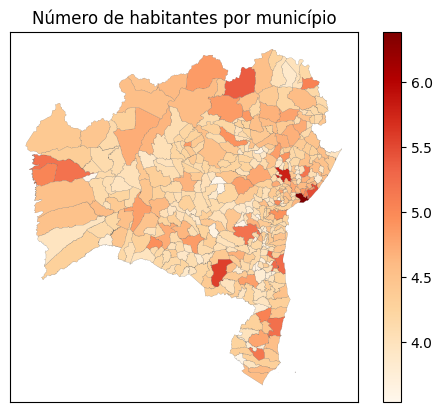

In [51]:
r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'Populacao',legend=True,cmap='OrRd',edgecolor='#4B4B4B',linewidth = 0.1)

plt.xticks([])
plt.yticks([])
plt.title('Número de habitantes por município')
plt.show()

### Analisando a taxa de alfabetização nos municípios

In [53]:
querry = """
SELECT m.GEOMETRY, a.V00900,a.V00901,  a.V00900 * 1.0 / (a.V00900 + a.V00901) as TAXA_ALFABETIZACAO
FROM municipio m,alfabetizacao a
WHERE m.CD_MUN = a.CD_MUN 
"""

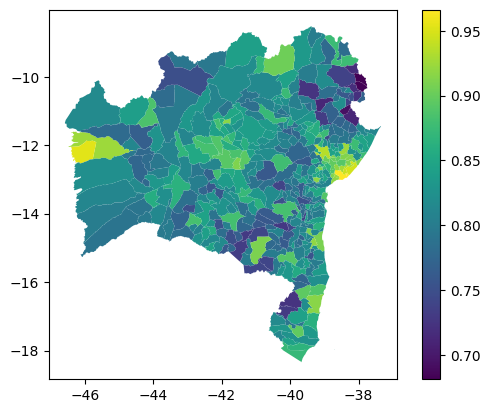

In [54]:
r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'TAXA_ALFABETIZACAO',legend=True)
plt.show()

### Conclusão 


Para o candidato com mais votos dentre todos é possível notar um padrão em relação à taxa de alfabetização nos municípios onde o mesmo foi mais votado, ou seja, não é possível perceber uma correlação significativa entre este indicativo socioeconômico e os votos.

Para a candidata mais votada dentre os eleitos por média o mesmo acontece, mesmo com um padrão de votos muito mais concentrado que o primeiro candidato ainda não é possível reconhecer padrões que levam à uma correlação significativa entre os votos e a taxa de alfabetização.

Já no caso do candidato não eleito mais votado o mesmo acontece, demonstrando que este indicador não aparenta ter impacto no padrão de votos recebidos pelso candidatos.

Enfim, não há, aparentemente, uma grande correlação entre a quantidade de votos obtidos em cada município, para os candidatos levandos em consideração, e a taxa de alfabetização dos habitantes de um município, ou seja, esse indicador socioeconônimico não se mostrou um fator determinante ao comparar os padrões de votos dos eleitores selecionados.

Porém, um dado relevante é levado à tona ao longo desta análise, pois é possível notar de forma clara uma grande correlação positiva entre a taxa de alfabetização e a população dos municípios, demonstrando algo que o pensamento intuitivo de que cidades mais populosas geram maior acesso à educação e, consequentemente, alfabetização se mostra coerente com os dados apresentados.

## Analisando correlação dos votos dos candidatos escolhidos com dado extra

Considerando que a produção de soja é a atividade agropecuária predominante no estado, utilizaremos o rendimento dessa cultura para analisar a correlação entre a distribuição dos votos dos candidadatos e os dados sobre o censo_agro.

In [58]:
querry="""
select m.GEOMETRY ,ca.rendimento_soja as RENDIMENTO_SOJA
from censo_agro ca, municipio m 
WHERE ca.CD_MUN = m.CD_MUN
"""

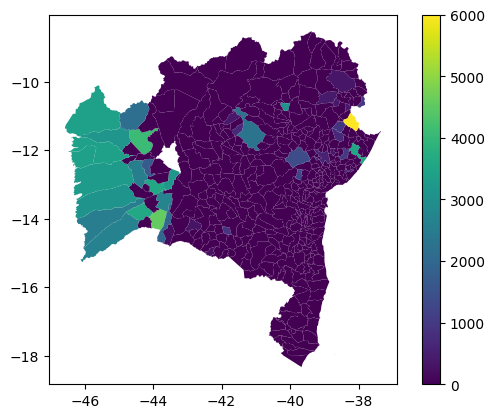

In [59]:
r = geopandas.read_postgis(querry,conn,geom_col='GEOMETRY')
r.plot(column = 'RENDIMENTO_SOJA',legend=True)
plt.show()

### Conclusão


Neste caso, é possível notar que para o candidato mais votado a localizacão com maior rendimento de cultura de soja coincide com um local onde a quantidade de votos no candidato foi significativa, mesmo não sendo um dos locais onde ele possui maior porcentagem de votos, ainda há uma relação entre os números, que pode não representar uma correlação mas aponta para algo nesse sentido.

Já para o caso da candidata mais votada dentre os eleitos pela média esse índice não demontrou a priore uma correlação com a distruibuição de seus votos, dado que em todos os pontos onde ela teve uma quantidade relevante de votos não haviam culturas de soja.

Para o caso do candidato mais votado dentre os não eleitos o padrão visto pela candidata analisada anteriormente se mantém, fortalecendo a ideia de que a relação entre os votos e este índice seja talvez só coinscidência no caso do primeiro candidato avaliado.

Por fim, este dado também não se mostrou relevante para entender melhor a distribuição dos votos dos candidatos avaliados.